In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

## Calculating descriptive values for a univariate data
Here we will be solving the problem 2.2 of textbook

-----------------------------------------------------------------------------------------------------------
Answer to Q2.2.a
Mean of the data is 29.962962962962962


As n is odd, the median is 25 with formula being  X[(n+1)/2]
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Answer to Q2.2.b
The following models are available and we have 2 modes


,Age,Count_Age
7,25,4
10,35,4




Modal values - [25, 35]
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Answer to Q2.2.c and Q2.2.d
We will first calculate the lower quantile of data
The lower quantile (Q1) for n being odd is 20


We will now calculate the upper quantile of data
The upper quantile (Q3) for n being odd is 35


The midrange of data is 15
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Answer to Q2.2.e
The 5 point summary is described below


,age
count,27.000000
mean,29.962963
std,12.942124
min,13.000000
25%,20.500000
50%,25.000000
75%,35.000000
max,70.000000


-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Answer to Q2.2.e


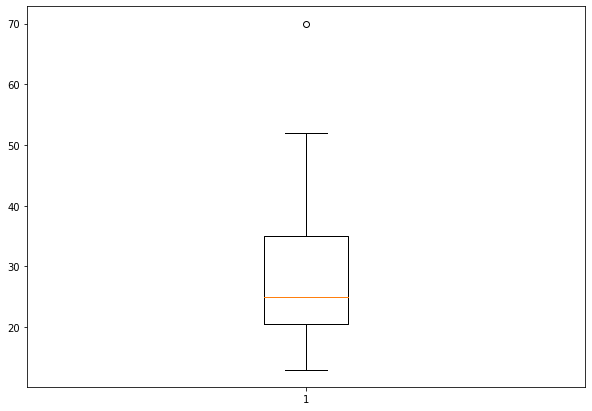

-----------------------------------------------------------------------------------------------------------


In [3]:
age      = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]
X        = np.array(age)

print('-----------------------------------------------------------------------------------------------------------')
print(f'Answer to Q2.2.a')
print(f'Mean of the data is {np.mean(np.array(age))}')
print('\n')

n = len(age)
if n%2==0:
  median = (X[(n//2)-1]+X[((n//2)+1)-1])/2
  print(f'As n is even, the median is {median} with formula being  (X[n/2]+X[(n/2)+1])/2')
else:
  index2consider = ((n+1)//2)-1
  median = X[index2consider]
  print(f'As n is odd, the median is {median} with formula being  X[(n+1)/2]')
print('-----------------------------------------------------------------------------------------------------------')
print('\n')


print('-----------------------------------------------------------------------------------------------------------')
print(f'Answer to Q2.2.b')
df        = pd.DataFrame(age,columns=['Age'])
count_age = df.groupby(['Age']).agg({'Age':'count'}).rename({'Age':'Count_Age'},axis=1).reset_index()
count_age = count_age.sort_values(by=['Count_Age'],ascending=False)
max_count = count_age['Count_Age'].max()
mode_df   = count_age[count_age['Count_Age']==max_count]
print(f'The following models are available and we have {mode_df.shape[0]} modes')
display(mode_df)
print('\n')
modal_vals = mode_df['Age'].values.tolist()
print(f'Modal values - {modal_vals}')
print('-----------------------------------------------------------------------------------------------------------')
print('\n')


print('-----------------------------------------------------------------------------------------------------------')
print(f'Answer to Q2.2.c and Q2.2.d')
print(f'We will first calculate the lower quantile of data')
if n%2==0:
  Q1 = ( X[(n//4)-1] + X[((n//4)+1)-1] )/2
  print(f'The lower quantile (Q1) for n being even is {Q1}')
else:
  Q1 = X[((n+1)//4)-1]
  print(f'The lower quantile (Q1) for n being odd is {Q1}')

print('\n')
print(f'We will now calculate the upper quantile of data')
if n%2==0:
  Q3 = (X[3*(n//4)-1]+X[3*((n//4)+1)-1])/2
  print(f'The upper quantile (Q3) for n being even is {Q3}')
else:
  Q3 = X[(3*(n+1)//4)-1]
  print(f'The upper quantile (Q3) for n being odd is {Q3}')
print('\n')
print(f'The midrange of data is {Q3-Q1}')
print('-----------------------------------------------------------------------------------------------------------')
print('\n')

print('-----------------------------------------------------------------------------------------------------------')
print(f'Answer to Q2.2.e')
df = pd.DataFrame(X,columns=['age'])
print('The 5 point summary is described below')
display(df.describe([0.25,0.75,0.5]))
print('-----------------------------------------------------------------------------------------------------------')
print('\n')

print('-----------------------------------------------------------------------------------------------------------')
print(f'Answer to Q2.2.e')
fig = plt.figure(figsize =(10, 7))
plt.boxplot(X)
plt.show()
print('-----------------------------------------------------------------------------------------------------------')

# Median of Grouped Frequency data
We will try to find the median of a grouped frequency distribution for textbook Question 2.2 

In [4]:
lb = [1,6,16,21,51,81]
ub = [5,15,20,50,80,100]
freq = [200,450,300,1500,700,44]

df = pd.DataFrame(columns = ['lower_bound','upper_bound','frequency'])
df['lower_bound'] = lb
df['upper_bound'] = ub
df['frequency']   = freq
print('We have a frequency data given as ')
display(df)
print('\n')

print('---------------------------------------------------------------------------------')
print('Interval adjusted dataset is ')
df['lower_bound_adjusted'] = df['lower_bound'].apply(lambda z: z-0.5)
df['upper_bound_adjusted'] = df['upper_bound'].apply(lambda z: z+0.5)
display(df)
print('\n')
print('---------------------------------------------------------------------------------')


df['Cumulative_freq'] = df['frequency'].cumsum()
median_pt             = df['frequency'].sum()//2
print(f'The approximate median point is {median_pt}')
print('\n')
df['Track']           = np.where(df['Cumulative_freq']>median_pt,1,0)
display(df)
print('\n')

print('-------------------------------------------------------------------------------')
print('We find values that will be used for median calculation')
C     = df[df['Track']==0].iloc[-1]['Cumulative_freq']
print(f'The cumulative frequency of class preceeding the median class is {C}. It will be denoted by C')

subdf = df[df['Track']>0].iloc[0]
L     = subdf['lower_bound_adjusted']
print(f'The lower bound of median class is {L}. It will be denoted by L\n')

h     = subdf['upper_bound_adjusted']-subdf['lower_bound_adjusted']
print(f'The class width of median class is {h}. It will be denoted by h\n')

f     = subdf['frequency']
print(f'The frequency of median class is {f}. It will be denoted by f\n')

N     = df['frequency'].sum()
print(f'The overall sum of observations is {N}. It will be denoted by N\n')

Median = L+h*(((N/2)-C)/f)
print(f'Median is {Median}')
print('Formula for calculation of median is Median = L+h*(((N/2)-C)/f)\n')

print('\n')

We have a frequency data given as 


,lower_bound,upper_bound,frequency
0,1,5,200
1,6,15,450
2,16,20,300
3,21,50,1500
4,51,80,700
5,81,100,44




---------------------------------------------------------------------------------
Interval adjusted dataset is 


,lower_bound,upper_bound,frequency,lower_bound_adjusted,upper_bound_adjusted
0,1,5,200,0.5,5.5
1,6,15,450,5.5,15.5
2,16,20,300,15.5,20.5
3,21,50,1500,20.5,50.5
4,51,80,700,50.5,80.5
5,81,100,44,80.5,100.5




---------------------------------------------------------------------------------
The approximate median point is 1597




,lower_bound,upper_bound,frequency,lower_bound_adjusted,upper_bound_adjusted,Cumulative_freq,Track
0,1,5,200,0.5,5.5,200,0
1,6,15,450,5.5,15.5,650,0
2,16,20,300,15.5,20.5,950,0
3,21,50,1500,20.5,50.5,2450,1
4,51,80,700,50.5,80.5,3150,1
5,81,100,44,80.5,100.5,3194,1




-------------------------------------------------------------------------------
We find values that will be used for median calculation
The cumulative frequency of class preceeding the median class is 950.0. It will be denoted by C
The lower bound of median class is 20.5. It will be denoted by L

The class width of median class is 30.0. It will be denoted by h

The frequency of median class is 1500.0. It will be denoted by f

The overall sum of observations is 3194. It will be denoted by N

Median is 33.44
Formula for calculation of median is Median = L+h*(((N/2)-C)/f)





### Median of Bivariate data
We will solve question 2.4 from the text book 

-----------------------------------------------------------------------------------------------------------
answer to q2.3.a
The mean, median, standard deviation for age is (46.44444444444444, 51.0, 13.218624215242327)
The mean, median, standard deviation for fat percentage is (28.783333333333328, 30.7, 9.2543948224296)
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Answer to Q2.3.b
The following box-plot is for age


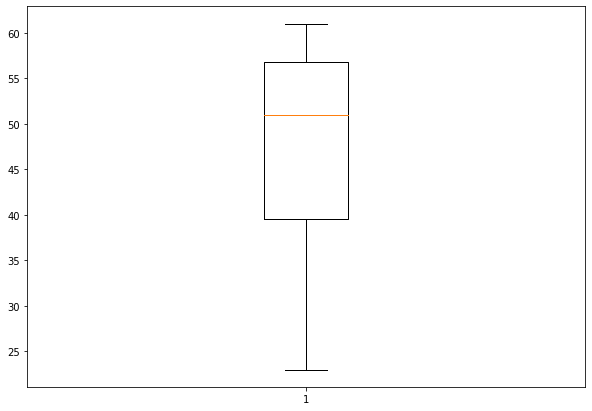



The following box-plot is for fat percentage


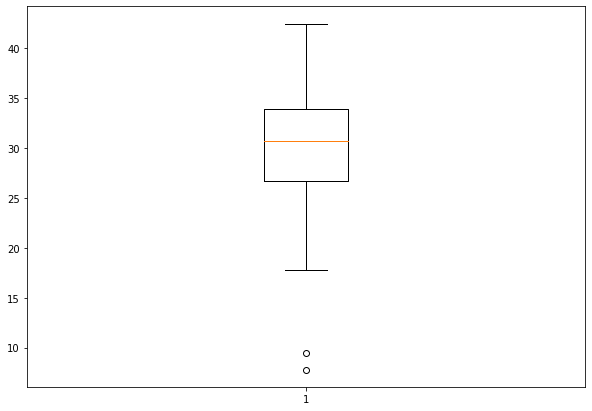

-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Answer to Q2.3.c
The scatter plot between fat percentage and age is 


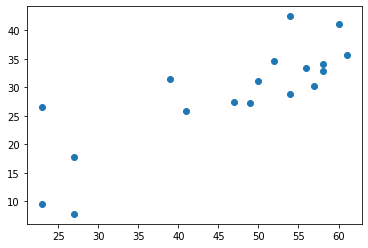



The Quantile-quantile plot for AGE is 


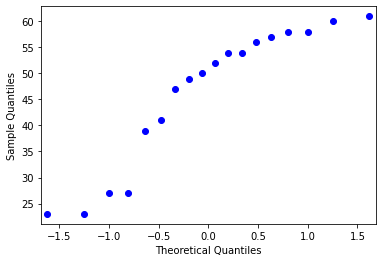



The Quantile-quantile plot for Fat percentage is 


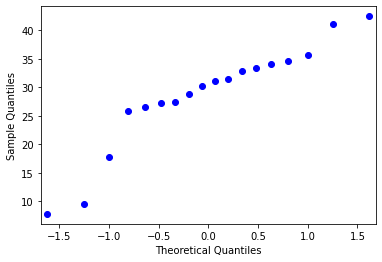



-----------------------------------------------------------------------------------------------------------


In [5]:
age = [23,23,27,27,39,41,47,49,50,52,54,54,56,57,58,58,60,61]
fat = [9.5,26.5,7.8,17.8,31.4,25.9,27.4,27.2,31.2,34.6,42.5,28.8,33.4,30.2,34.1,32.9,41.2,35.7]
df  = pd.DataFrame(columns = ['AGE','FAT'])
df['AGE'] = age
df['FAT'] = fat
print('-----------------------------------------------------------------------------------------------------------')
print('answer to q2.3.a')
print(f"The mean, median, standard deviation for age is {df['AGE'].mean(),df['AGE'].median(),df['AGE'].std()}")
print(f"The mean, median, standard deviation for fat percentage is {df['FAT'].mean(),df['FAT'].median(),df['FAT'].std()}")
print('-----------------------------------------------------------------------------------------------------------')

print('-----------------------------------------------------------------------------------------------------------')
print(f'Answer to Q2.3.b')
print('The following box-plot is for age')
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['AGE'].values)
plt.show()
print('\n')
print('The following box-plot is for fat percentage')
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['FAT'].values)
plt.show()
print('-----------------------------------------------------------------------------------------------------------')
print('\n')

print('-----------------------------------------------------------------------------------------------------------')
print(f'Answer to Q2.3.c')
print('The scatter plot between fat percentage and age is ')
plt.scatter(df['AGE'],df['FAT'])
plt.show()
print('\n')

print('The Quantile-quantile plot for AGE is ')
sm.qqplot(df['AGE'].values)
py.show()
print('\n')
print('The Quantile-quantile plot for Fat percentage is ')
sm.qqplot(df['FAT'].values)
py.show()
print('\n')
print('-----------------------------------------------------------------------------------------------------------')
